## Compulsory Task 1

In [285]:
# Importing necessary modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading Data & Data Cleaning
Here, any unnecessary columns are dropped (such as columns that contain strings). Also, as there are missing values in the 'Age' column, these empty spaces are filled with imputed values.

In [286]:
# Reading data from 'titanic.csv' file and storing data in dataframe.
df = pd.read_csv('titanic.csv', encoding='unicode_escape')

# Displaying first 5 rows of dataframe.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [287]:
# Dropping any columns that contain strings or have too many missing values.
data = df.drop(['PassengerId','Sex','Name','Ticket','Cabin','Embarked'], axis=1)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [288]:
# Replacing missing values in 'Age' column with median ages imputed from the 'Pclass' column.

# Finding the median age for each passenger class
median_age = data.groupby(['Pclass'])['Age'].median()
print(median_age)

# Depending on the passengers class, any missing age values are replaced with the median age for that class.
for passenger_class in data['Pclass']:
    if passenger_class == 1:
        data['Age'].fillna(value=round(median_age[0:1][1]), inplace=True)
    elif passenger_class == 2:
        data['Age'].fillna(value=round(median_age[1:2][2]), inplace=True)
    elif passenger_class == 3:
        data['Age'].fillna(value=round(median_age[2:3][3]), inplace=True)
    else:
        print('Error: Something went wrong...')

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64


/var/folders/tf/jb3kbn_x7yn1kh8xwwzcqrbc0000gn/T/ipykernel_39543/1567161816.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data['Age'].fillna(value=round(median_age[2:3][3]), inplace=True)
/var/folders/tf/jb3kbn_x7yn1kh8xwwzcqrbc0000gn/T/ipykernel_39543/1567161816.py:10: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data['Age'].fillna(value=round(median_age[0:1][1]), inplace=True)
/var/folders/tf/jb3kbn_x7yn1kh8xwwzcqrbc0000gn/T/ipykernel_39543/1567161816.py:12: FutureWarni

### Training the Models
3 Models (Bagged, Boosted and Random Forest Trees) are trained on the training data and their accuracies are reported.

In [289]:
# Assigning independent variables to 'x' variable.
# Assigning dependent variable to 'y' variable.
# Reshaping variables to allow for compatibility.
x = data.iloc[:,[1,2,3,4,5]].values.reshape(-1,5)
y = data.iloc[:,0].values

# Splitting dataset into 80% training and 20% testing.
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

print(f'Training Set Size: {x_train.shape} {y_train.shape}')
print(f'Test Set Size: {x_test.shape} {y_test.shape}')

Training Set Size: (712, 5) (712,)
Test Set Size: (179, 5) (179,)


In [290]:
# Creating our Base Model
base_model = DecisionTreeClassifier(max_depth=4)

# Creating and Training Bagged Model.
bagged_model = BaggingClassifier(base_estimator=base_model, n_estimators=100)
bagged_model.fit(x_train, y_train)

# Creating and Training Random Forest Model.
random_forest = RandomForestClassifier(max_depth=4, n_estimators=100)
random_forest.fit(x_train, y_train)

# Creating and Training Boosted Model.
boosted_model = AdaBoostClassifier(base_estimator=base_model, n_estimators=100)
boosted_model.fit(x_train, y_train)

# Calculating testing accuracies of all models.
print("Testing accuracy of models: ")
print(f"Bagged Tree Accuracy:\t {bagged_model.score(x_test,y_test)}")
print(f"Random Forest Accuracy:\t {random_forest.score(x_test,y_test)}")
print(f"Boosted Tree Accuracy:\t {boosted_model.score(x_test,y_test)}")

Testing accuracy of models: 
Bagged Tree Accuracy:	 0.7039106145251397
Random Forest Accuracy:	 0.6983240223463687
Boosted Tree Accuracy:	 0.659217877094972


### Finding Most Important Features
The Random Forest model is used to determine which of the features contributes the most in predicting whether a passenger survives or not.

In [291]:
important_features = pd.Series(random_forest.feature_importances_).sort_values(ascending=False)
important_features

4    0.356694
0    0.337345
1    0.175830
2    0.079005
3    0.051125
dtype: float64

We can see that the features that contribute the most to the predictions are:
1) Fare
2) Passenger Class
3) Age
4) Sibling/Spouse
5) Parent/Child

### Tuning Parameters
The Boosted Model is used to tune the n_estimators and max_depth parameters.
First, the max_depth is kept at 4, whilst the n_estimators is tuned from 1 to 1001 in steps of 100.
Next, the n_estimators is kept at 100, whilst max_depth is tuned from 1 to 10.

Estimators: 1 	 Accuracy: 0.6703910614525139
Estimators: 101 	 Accuracy: 0.664804469273743
Estimators: 201 	 Accuracy: 0.6871508379888268
Estimators: 301 	 Accuracy: 0.6983240223463687
Estimators: 401 	 Accuracy: 0.6871508379888268
Estimators: 501 	 Accuracy: 0.7039106145251397
Estimators: 601 	 Accuracy: 0.6927374301675978
Estimators: 701 	 Accuracy: 0.7094972067039106
Estimators: 801 	 Accuracy: 0.6927374301675978
Estimators: 901 	 Accuracy: 0.6759776536312849
Estimators: 1001 	 Accuracy: 0.7039106145251397
Depths: 1 	 Accuracy: 0.6927374301675978
Depths: 2 	 Accuracy: 0.664804469273743
Depths: 3 	 Accuracy: 0.6703910614525139
Depths: 4 	 Accuracy: 0.6871508379888268
Depths: 5 	 Accuracy: 0.659217877094972
Depths: 6 	 Accuracy: 0.6759776536312849
Depths: 7 	 Accuracy: 0.6703910614525139
Depths: 8 	 Accuracy: 0.6424581005586593
Depths: 9 	 Accuracy: 0.6424581005586593
Depths: 10 	 Accuracy: 0.659217877094972


Text(0, 0.5, 'Accuracy')

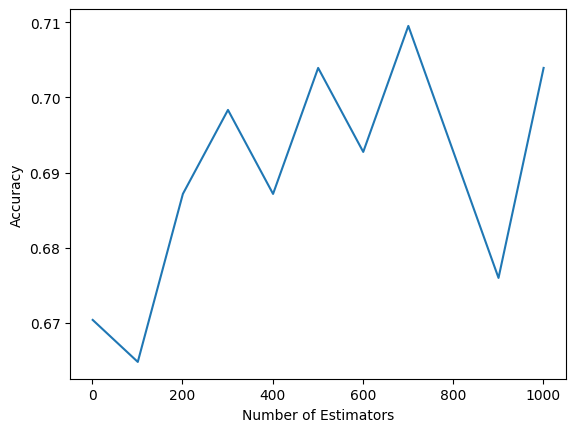

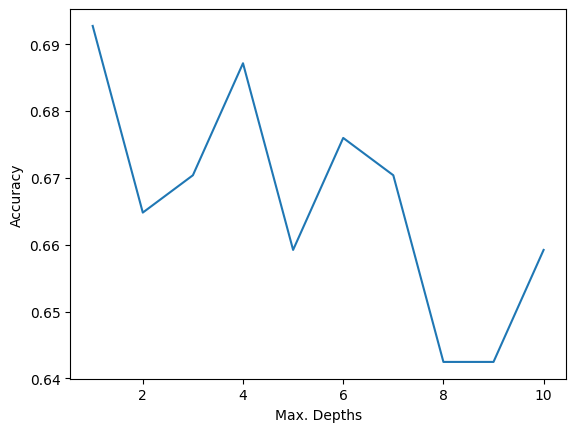

In [292]:
# Boosted Tree
estimators = range(1,1100,100)
depths = range(1,11)
est_accuracy = []
depth_accuracy = []

# Keeping Max Depth=4 and Adjusting Number of Estimators.
for n in estimators:
    base = DecisionTreeClassifier(max_depth=4)
    model = AdaBoostClassifier(base_estimator=base, n_estimators=n)
    model.fit(x_train,y_train)

    print(f"Estimators: {n} \t Accuracy: {model.score(x_test,y_test)}")
    est_accuracy.append(model.score(x_test,y_test))

best_est = estimators[np.argmax(est_accuracy)]

# Keeping Number of Estimator=100 and Adjusting Max Depth.
for d in depths:
    base = DecisionTreeClassifier(max_depth=d)
    model = AdaBoostClassifier(base_estimator=base, n_estimators=best_est)
    model.fit(x_train,y_train)

    print(f"Depths: {d} \t Accuracy: {model.score(x_test,y_test)}")
    depth_accuracy.append(model.score(x_test,y_test))

# Plotting the testing accuracies for each max_depth and n_estimators values.
plt.figure()
plt.plot(estimators,est_accuracy)
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')

plt.figure()
plt.plot(depths,depth_accuracy)
plt.xlabel('Max. Depths')
plt.ylabel('Accuracy')


In [293]:
# Displaying the values for max_depth and n_estimators that produced the best testing accuracy.
best_depth = depths[np.argmax(depth_accuracy)]
print("Best Number of Estimators: ", best_est)
print("Best Depth Value: ", best_depth)

Best Number of Estimators:  701
Best Depth Value:  1


### Retraining Models with Best Depth and Number of Estimator Values

In [294]:
# Creating Base Model
base_model = DecisionTreeClassifier(max_depth=best_depth)

# Creating and Training Bagged Model with Tuned Parameters.
bagged_model = BaggingClassifier(base_estimator=base_model, n_estimators=best_est)
bagged_model.fit(x_train, y_train)

# Creating and Training Random Forest Model with Tuned Parameters.
random_forest = RandomForestClassifier(max_depth=best_depth, n_estimators=best_est)
random_forest.fit(x_train, y_train)

# Creating and Training Boosted Model with Tuned Parameters.
boosted_model = AdaBoostClassifier(base_estimator=base_model, n_estimators=best_est)
boosted_model.fit(x_train, y_train)

print("Accuracy of models using tuned parameters: ")
print(f"Bagged Tree Accuracy:\t {bagged_model.score(x_test,y_test)}")
print(f"Random Forest Accuracy:\t {random_forest.score(x_test,y_test)}")
print(f"Boosted Tree Accuracy:\t {boosted_model.score(x_test,y_test)}")

Accuracy of models using tuned parameters: 
Bagged Tree Accuracy:	 0.6759776536312849
Random Forest Accuracy:	 0.6983240223463687
Boosted Tree Accuracy:	 0.6927374301675978


In [295]:
print(f'''
Without Tuning, the Best Performing Model was: Random Forest (n_estimators=100, max_depth=4)

With Tuning, the Best Performing Model was: Random Forest (n_estimators={best_est}, max_depth={best_depth})

''')


Without Tuning, the Best Performing Model was: Random Forest (n_estimators=100, max_depth=4)

With Tuning, the Best Performing Model was: Random Forest (n_estimators=701, max_depth=1)


